In [6]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 2.0615 - accuracy: 0.3011
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.2932 - accuracy: 0.6545
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.0909 - accuracy: 0.7001
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9817 - accuracy: 0.7245
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.9013 - accuracy: 0.7460
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8473 - accuracy: 0.7568
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8010 - accuracy: 0.7670
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7615 - accuracy: 0.7744
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7362 - accuracy: 0.7802
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.7877


In [14]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 530us/step - loss: 0.7126 - accuracy: 0.7791


[0.7125977873802185, 0.7791000008583069]

In [15]:
model.predict(X_test.reshape(-1, 784))

array([[0.16002017, 0.09317672, 0.23362032, ..., 0.8639623 , 0.4657436 ,
        0.9525325 ],
       [0.5760911 , 0.31447995, 0.9558971 , ..., 0.18215907, 0.30491778,
        0.28170663],
       [0.4877385 , 0.9886497 , 0.4822597 , ..., 0.23119757, 0.31741565,
        0.16692343],
       ...,
       [0.76307845, 0.3442462 , 0.33290786, ..., 0.24242651, 0.93401307,
        0.44119668],
       [0.53568506, 0.9780867 , 0.44727942, ..., 0.27734464, 0.29056007,
        0.18283278],
       [0.13346231, 0.26717663, 0.26009387, ..., 0.9301256 , 0.48621705,
        0.767732  ]], dtype=float32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


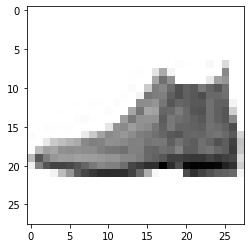

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[0])

plt.imshow(X_test[0], cmap="gray_r")
plt.show()

In [16]:
pred = model.predict(X_test.reshape(-1, 784))

In [20]:
import numpy as np

np.argmax(pred[0])

9